# Восстановление золота из руды

## Подготовка данных

Откроем файлы с данными и изучим их, для этого подключим библиотеку `pandas` помимо неё подключим еще остальные библиотеки, которые нам пригодятся. Для того чтобы прочитать данные из датасетов воспользуемся методом `read_csv`, для получения общей информации о датасетах воспользуемся методом `info`.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor

In [2]:
try:
    data_gold_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    data_gold_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    data_gold_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
except:
    data_gold_train = pd.read_csv('gold_recovery_train_new.csv')
    data_gold_test = pd.read_csv('gold_recovery_test_new.csv')
    data_gold_full = pd.read_csv('gold_recovery_full_new.csv')
data_gold_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [3]:
data_gold_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [4]:
data_gold_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
data_gold_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [6]:
data_gold_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [7]:
data_gold_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


Информацию посмотрели, очень много предоставлено различных данных в большем количестве столбцов, сразу бросается в глаза, что у тестовой выборки меньше всего столбцов, а у обучающей и общей выборке количество столбцов одинаковое. Информация в столбцах представляет из себя разное количество различных элементов при обработке золота на каждом из этапов, также судя по названию столбцов можно заметить, что золото на двух этапах очистки проходит несколько флотационных установок. Столбцы, которые в название содержать слово `final` показывает параметры уже обработанной золотой руды. 

Все столбцы имеют корректный тип данных, только заметно что в столбцах есть некое количество пропусков, далее обработаем эти пропуски, а сейчас проверим, что эффективность обогащения рассчитана правильно, для этого вычислим её для признака "Эффективность обогащения золота после флотации" `rougher.output.recovery` из обучающей выборки, для проверки эффективности расчета, будем использовать метрику *MAE*. Для расчета метрики, нам понадобится информация в следующих столбцах:

- `rougher.output.concentrate_au` — доля золота в концентрате после флотации;
- `rougher.input.feed_au` — доля золота в сырье/концентрате до флотации;
- `rougher.output.tail_au` — доля золота в отвальных хвостах после флотации.

Рассчитаем эффективность обогащения и сравним потом наши расчеты и значения в столбце `rougher.output.recovery` в обучающей выборке по метрике *MAE*: 

In [8]:
recovery_au_by_rougher_train = ((data_gold_train['rougher.output.concentrate_au'] * (
                                   data_gold_train['rougher.input.feed_au'] - data_gold_train['rougher.output.tail_au']
                               )) / (data_gold_train['rougher.input.feed_au'] * (
                                    data_gold_train['rougher.output.concentrate_au'] - 
                                    data_gold_train['rougher.output.tail_au']))) * 100
recovery_au_by_rougher_train

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64

In [9]:
mean_absolute_error(recovery_au_by_rougher_train, data_gold_train['rougher.output.recovery'])

9.73512347450521e-15

По метрике *МАЕ* видно, что в обучающей выборке эффективность обогащения после флотации расчитано корректно, ошибка между нашими расчетами и значениями в выборке не равна нулю, но она достаточно мала, чтобы ей пренебречь.

Вернемся к тому, что у нас в тестовой выборке меньше столбцев, чем в обучающей и общей выборке. Посмотрим какие это столбцы:

In [10]:
list(set(data_gold_train.columns) ^ set(data_gold_test.columns))

['rougher.output.concentrate_pb',
 'final.output.tail_sol',
 'final.output.concentrate_ag',
 'final.output.concentrate_sol',
 'primary_cleaner.output.tail_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'final.output.concentrate_au',
 'rougher.output.tail_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.output.tail_ag',
 'final.output.concentrate_pb',
 'primary_cleaner.output.concentrate_ag',
 'secondary_cleaner.output.tail_sol',
 'secondary_cleaner.output.tail_ag',
 'final.output.recovery',
 'rougher.calculation.au_pb_ratio',
 'final.output.tail_au',
 'secondary_cleaner.output.tail_pb',
 'final.output.tail_pb',
 'rougher.output.concentrate_sol',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.tail_au',
 'secondary_cleaner.output.tail_au',
 'rougher.output.tail_pb',


Как видно из названий столбцев, это параметры из разных этапов получения золота из руды, здесь и флотация и первый и второй этап очистки, есть также информация об отвалочных хвостах и финальных характерисках. По содержанию элементов, видно, что есть столбцы, которые показывают информацию по содержанию золота на различных этапах, а также других различных металлов. 

У нас есть общая выборка, которая содержит обучающую и тестовую выборки, можно из неё взять недостающие столбцы для тестовой выборки, но также в общей выборке есть пропуски, для начала необходимо от них избавиться, посмотри сколько всего пропусков в различных столбцах. Для того, чтобы посмотреть количество пропусков во всех столбцах, уберем ограничение в `pandas` на количество выводих строк с помощью опции **display.max_rows** и метода `set_option`.

In [11]:
pd.set_option('display.max_rows', None)
print(data_gold_full.isna().sum())
pd.set_option('display.max_rows', 10)

date                                                     0
final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     1
final.output.tail_pb                                   101
final.output.tail_sol                                    6
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           24
primary_cleaner.input.depressant                        37
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         104
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                  116
primary_cleaner.output.concentrate_sol                 3

Во многих столбцах есть пропуски, где-то их совсем мало 1 или 2, в других столбцах их больше сотни или тысячи. В условиях задачи указано, что данные индексируются датой и временем получения информации (признак `date`). Соседние по времени параметры часто похожи. Заполним пропуски в столбцах значениями из соседних строк, где они не пустые, перед этим отсортируем значения по дате, при просмотре первых 5 строк было видно, что данные вроде как отсортированы по дате, однако у нас в данных почти 20 тысяч строк и смотреть вручную отсортированы все данные по дате или нет слишком долго.

In [12]:
data_gold_full = data_gold_full.sort_values(by='date')

In [13]:
data_gold_full

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19434,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
19435,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
19436,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
19437,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


Данные по дате отсортировались, заполним пропуски в данных, для заполнения пропусков будет брать значения из строки выше, то есть те данные, которые были получены раньше по времени, в этом нам поможет метод `ffill` из библиотеки `pandas`.

In [14]:
data_gold_full = data_gold_full.ffill(axis=0)

Проверим теперь остались ли пропуски:

In [15]:
pd.set_option('display.max_rows', None)
print(data_gold_full.isna().sum())
pd.set_option('display.max_rows', 10)

date                                                  0
final.output.concentrate_ag                           0
final.output.concentrate_pb                           0
final.output.concentrate_sol                          0
final.output.concentrate_au                           0
final.output.recovery                                 0
final.output.tail_ag                                  0
final.output.tail_pb                                  0
final.output.tail_sol                                 0
final.output.tail_au                                  0
primary_cleaner.input.sulfate                         0
primary_cleaner.input.depressant                      0
primary_cleaner.input.feed_size                       0
primary_cleaner.input.xanthate                        0
primary_cleaner.output.concentrate_ag                 0
primary_cleaner.output.concentrate_pb                 0
primary_cleaner.output.concentrate_sol                0
primary_cleaner.output.concentrate_au           

Пропуски в данных удалены, можно восстановливать столбцы в тестовой выборке, посмотрим какая первая и последняя дата в тестовой выборке, но перед этим отсортируем выборку:

In [16]:
data_gold_test = data_gold_test.sort_values(by='date')
data_gold_test

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5286,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5287,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5288,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


Данные в тестовой выборке начинаются с 1 сентября 2016 года и заканчиваются 31 декабря 2017 года, посмотрим какой индекс у таких же даты и времени в общей выборке:

In [17]:
data_gold_full[data_gold_full['date'] == data_gold_test.loc[0, 'date']][data_gold_test.columns]

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
4682,2016-09-01 00:59:59,210.800909,14.993118,8.08,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.31785,4.872511,-500.037437,26.705889,-499.709414


In [18]:
data_gold_full[data_gold_full['date'] == data_gold_test.loc[5289, 'date']][data_gold_test.columns]

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
15059,2017-12-31 23:59:59,181.556856,14.99585,8.07,1.623454,1498.096303,-499.796922,1501.743791,-505.146931,1499.535978,...,20.034715,-500.728588,14.914199,-499.948518,10.986607,-500.658027,8.989497,-500.337588,8.988632,-500.764937


По индексы строк видно, что в общей выборке количество строк между первой и последней строкой из тестовой выборки в 3 раза больше, чем в тестовой выборке, даже с учетом того, что выборки были отсортированы по дате, не получится просто перенести недостающие столбцы в тестовую выборку с общей с помощью подвыборки с количеством строк как в тестовой выборке. Добавим в тестовую выборку столбцы с помощью цикла, будем с помощью условий по дате из тестовой выборки находить строку с такой датой в общей выборке и из этой строки переносить столбцы в строку в тестовой выборке:

In [19]:
#сначала иницилизируем новые столбцы с пустыми значениями
new_columns_for_test = list(set(data_gold_train.columns) ^ set(data_gold_test.columns))
for i in range(len(new_columns_for_test)):
    data_gold_test[new_columns_for_test[i]] = np.nan
#затем заполняем новые столбцы значениями
for index in range(len(data_gold_test)):
    for new_column in new_columns_for_test:
        data_gold_test.loc[index, new_column] = data_gold_full[
            data_gold_full['date'] == data_gold_test.loc[index, 'date']][new_column].values

In [20]:
data_gold_test

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,rougher.output.concentrate_sol,primary_cleaner.output.concentrate_pb,primary_cleaner.output.tail_au,secondary_cleaner.output.tail_au,rougher.output.tail_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_pb,rougher.output.tail_au,rougher.calculation.floatbank10_sulfate_to_au_feed,final.output.tail_ag
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,33.791932,12.706851,6.587571,5.560988,0.747425,17.872038,4.148198,2.371757,2173.703032,12.688885
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,34.204715,12.587215,7.121551,5.790078,0.830029,18.063048,4.639624,2.647449,2812.792778,12.829171
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,33.777118,12.470523,7.706970,6.049673,0.879182,18.053777,5.042994,2.750630,2772.139527,12.977846
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,34.775256,12.689614,7.832021,5.911119,0.971844,19.358532,4.929174,2.842182,2665.948523,12.451947
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,34.633033,12.609439,9.553121,7.466258,1.081451,18.189253,4.875709,3.132740,2377.747157,11.827846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,29.382469,11.423963,3.158489,5.315728,0.513262,13.835909,4.483740,1.210968,2504.109152,13.944836
5286,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,29.662165,11.342292,2.999406,5.039799,0.560711,13.012497,4.070367,1.242229,2503.889476,12.624143
5287,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,32.084742,11.181956,3.957179,7.227386,0.547233,12.561993,4.348556,1.397920,2483.833746,12.134647
5288,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,33.041707,10.717962,3.590709,6.064193,0.482317,12.028476,4.699238,1.422450,2499.186126,12.331412


Количество столбцов в тестовой выборке теперь равно количеству столбце в общей и обучающей выборке, значения в новые столбцы тоже добавились корректно. Поменяем расположение столбцов в тестовом выборке так, чтобы оно было точно такое же как в обучащей и тестовой выборках:

In [21]:
new_data_gold_test = pd.DataFrame(columns=data_gold_train.columns)
for index_test in range(len(data_gold_test)):
    for column_test in new_data_gold_test.columns:
        new_data_gold_test.loc[index_test, column_test] = data_gold_test.loc[index_test, column_test]

data_gold_test = new_data_gold_test
data_gold_test

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,7.578381,10.466295,11.990938,40.743891,70.273583,12.688885,3.844413,11.075686,4.537988,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.31785,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,7.813838,10.581152,12.216172,39.604292,68.910432,12.829171,3.918901,11.132824,4.675117,...,12.05814,-498.695773,8.130979,-499.634209,7.95827,-525.839648,4.87885,-500.162375,25.01994,-499.819438
2,2016-09-01 02:59:59,7.623392,10.424024,12.31371,40.72419,68.143213,12.977846,4.026561,10.990134,4.828907,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.82851,24.994862,-500.622559
3,2016-09-01 03:59:59,8.552457,10.503229,13.07457,39.290997,67.776393,12.451947,3.780702,11.155935,4.96962,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.9314,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,8.078781,10.222788,12.475427,40.254524,61.467078,11.827846,3.632272,11.403663,5.256806,...,12.025367,-500.786497,8.054678,-500.3975,8.10789,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2017-12-31 19:59:59,5.000174,9.710255,10.845459,46.400415,68.919891,13.944836,3.373224,13.766506,3.890235,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5286,2017-12-31 20:59:59,4.956679,9.727962,9.705617,46.657393,68.440582,12.624143,2.974607,14.177795,3.809054,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5287,2017-12-31 21:59:59,4.779534,9.818943,8.255551,47.337296,67.092759,12.134647,2.843604,13.21996,3.909903,...,19.99413,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5288,2017-12-31 22:59:59,4.472036,9.473869,8.466341,48.258531,68.061186,12.331412,2.889243,12.165999,3.749126,...,19.95876,-499.95875,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.01266,-500.154284


Столбцы перенеслись корректно, теперь тестовое выборка похоже на обучающую и общую, только в ней меньше всего столбцов. Вернемся к пропускам в выборках, посмотрим сколько их в обучающей и тестовой выборках:

In [22]:
pd.set_option('display.max_rows', None)

In [23]:
print(data_gold_train.isna().sum())

date                                                     0
final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     0
final.output.tail_pb                                   100
final.output.tail_sol                                    5
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           20
primary_cleaner.input.depressant                        32
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         100
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                   86
primary_cleaner.output.concentrate_sol                 2

In [24]:
print(data_gold_test.isna().sum())

date                                                   0
final.output.concentrate_ag                            0
final.output.concentrate_pb                            0
final.output.concentrate_sol                           0
final.output.concentrate_au                            0
final.output.recovery                                  0
final.output.tail_ag                                   0
final.output.tail_pb                                   0
final.output.tail_sol                                  0
final.output.tail_au                                   0
primary_cleaner.input.sulfate                          4
primary_cleaner.input.depressant                       5
primary_cleaner.input.feed_size                        0
primary_cleaner.input.xanthate                         4
primary_cleaner.output.concentrate_ag                  0
primary_cleaner.output.concentrate_pb                  0
primary_cleaner.output.concentrate_sol                 0
primary_cleaner.output.concentr

In [25]:
pd.set_option('display.max_rows', 10)

В обучающей и тестовой выборке остались пропуски в данных, в тестовой их гораздо меньше, засчет того, что в перенесли столбцы из общей выборки, где уже заполнены все пропуски. Заполним пропуски в обучающей и тестовой выборке с помощью метода `ffill` из библиотеки `pandas`, которым заполнили пропуски в общей выборке:

In [26]:
data_gold_train = data_gold_train.ffill(axis=0)
data_gold_test = data_gold_test.ffill(axis=0)

Посмотрим теперь остались ли у нас пропуски в обучающей и тестовой выборках:

In [27]:
pd.set_option('display.max_rows', None)
print(data_gold_train.isna().sum())

date                                                  0
final.output.concentrate_ag                           0
final.output.concentrate_pb                           0
final.output.concentrate_sol                          0
final.output.concentrate_au                           0
final.output.recovery                                 0
final.output.tail_ag                                  0
final.output.tail_pb                                  0
final.output.tail_sol                                 0
final.output.tail_au                                  0
primary_cleaner.input.sulfate                         0
primary_cleaner.input.depressant                      0
primary_cleaner.input.feed_size                       0
primary_cleaner.input.xanthate                        0
primary_cleaner.output.concentrate_ag                 0
primary_cleaner.output.concentrate_pb                 0
primary_cleaner.output.concentrate_sol                0
primary_cleaner.output.concentrate_au           

In [28]:
print(data_gold_test.isna().sum())
pd.set_option('display.max_rows', 10)

date                                                  0
final.output.concentrate_ag                           0
final.output.concentrate_pb                           0
final.output.concentrate_sol                          0
final.output.concentrate_au                           0
final.output.recovery                                 0
final.output.tail_ag                                  0
final.output.tail_pb                                  0
final.output.tail_sol                                 0
final.output.tail_au                                  0
primary_cleaner.input.sulfate                         0
primary_cleaner.input.depressant                      0
primary_cleaner.input.feed_size                       0
primary_cleaner.input.xanthate                        0
primary_cleaner.output.concentrate_ag                 0
primary_cleaner.output.concentrate_pb                 0
primary_cleaner.output.concentrate_sol                0
primary_cleaner.output.concentrate_au           

От всех пропусков избались, посмотрим есть ли у нас в выборках явные дубликаты, неявные дубликаты, например по двум столбцам, будут естественны для наших выборок, так как у нас почти все столбцы числовые, поэтому неявные дубликаты считать не будем.

In [29]:
print(data_gold_train.duplicated().sum())
print(data_gold_test.duplicated().sum())
print(data_gold_full.duplicated().sum())

0
0
0


Явных дубликатов нет. От пропусков мы избавились, дубликаты проверили, можно переходить к исследовательскому анализу данных.

## Анализ данных

Посмотрим как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки на общей выборке. Построим для каждого металла по отдельному графику.

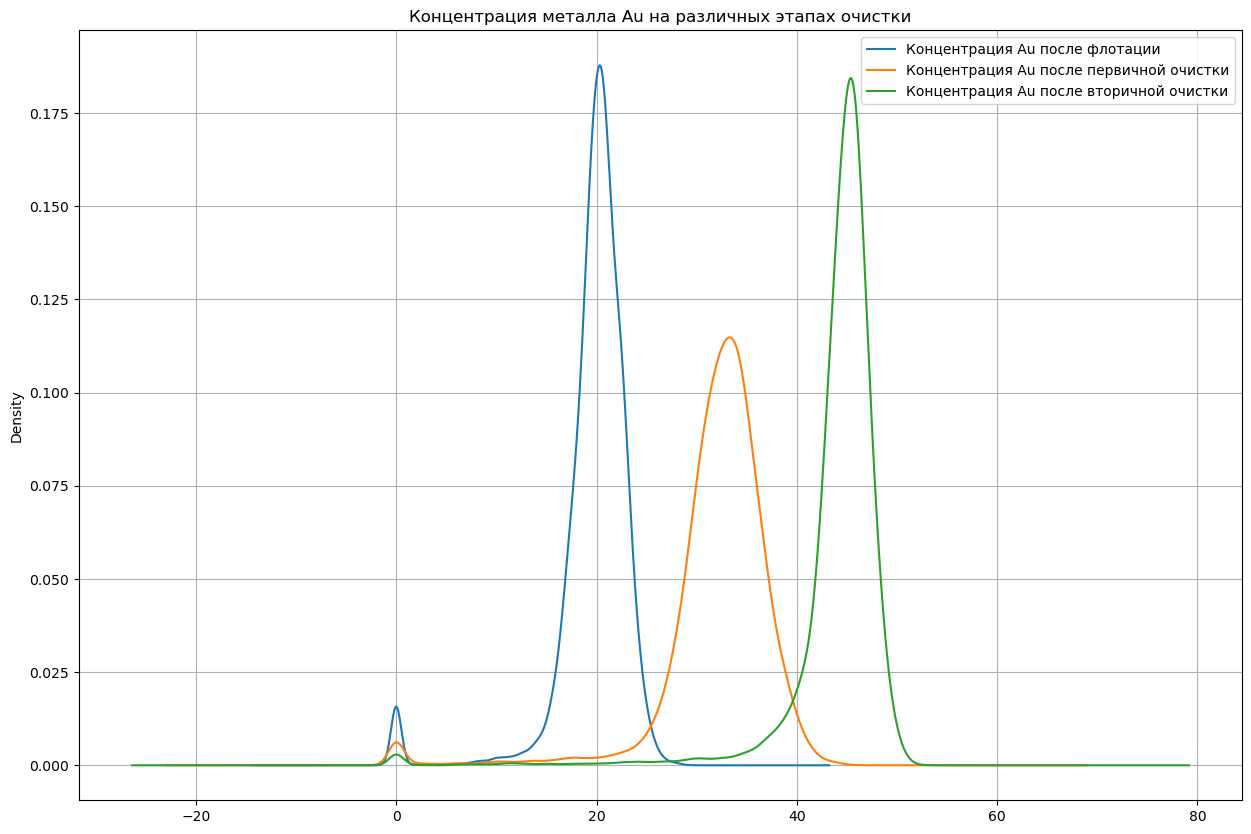

In [30]:
ax = plt.gca()

data_gold_full.plot(kind='kde', y='rougher.output.concentrate_au', ax=ax, figsize=(15, 10))
data_gold_full.plot(kind='kde', y='primary_cleaner.output.concentrate_au', ax=ax, figsize=(15, 10))
data_gold_full.plot(kind='kde', y='final.output.concentrate_au', ax=ax, figsize=(15, 10))

plt.grid(True)
plt.title('Концентрация металла Au на различных этапах очистки')
ax.legend(['Концентрация Au после флотации', 'Концентрация Au после первичной очистки', 
           'Концентрация Au после вторичной очистки'])
plt.show()

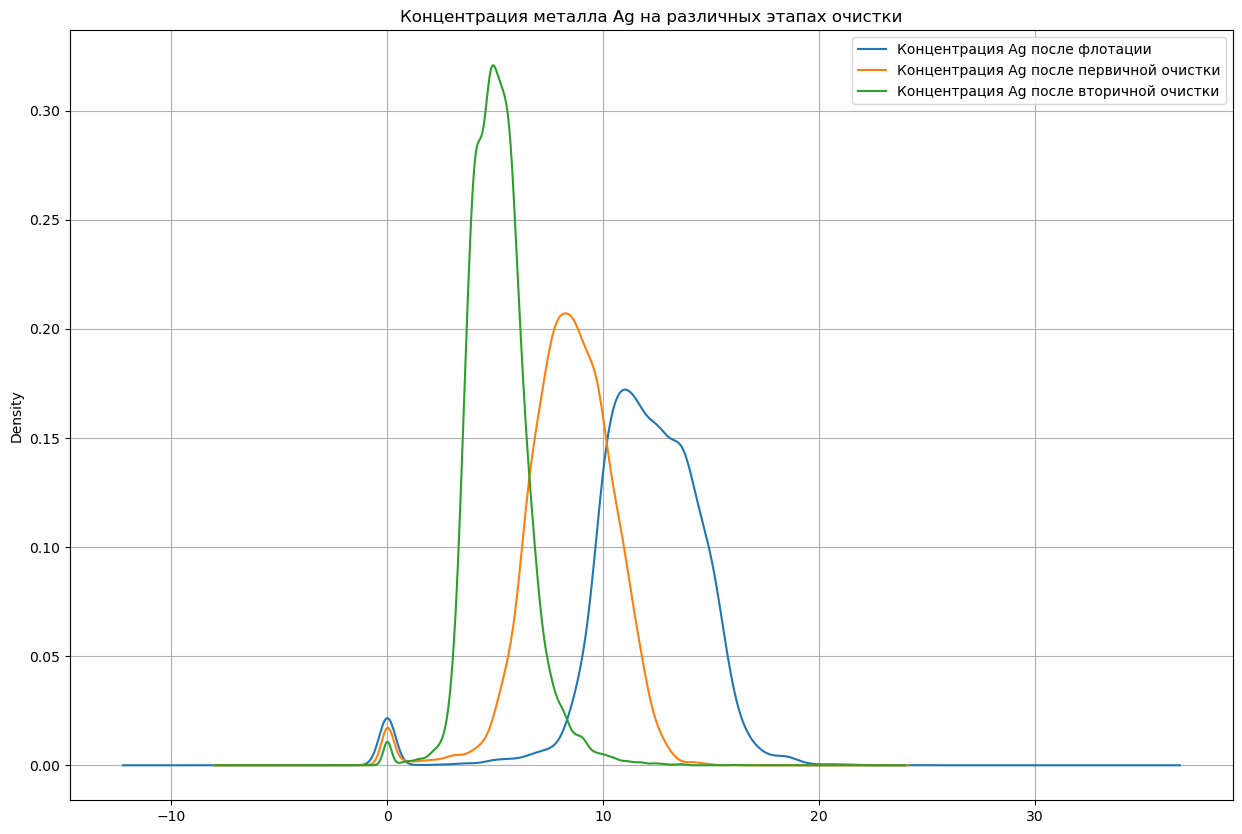

In [31]:
ax = plt.gca()

data_gold_full.plot(kind='kde', y='rougher.output.concentrate_ag', ax=ax, figsize=(15, 10))
data_gold_full.plot(kind='kde', y='primary_cleaner.output.concentrate_ag', ax=ax, figsize=(15, 10))
data_gold_full.plot(kind='kde', y='final.output.concentrate_ag', ax=ax, figsize=(15, 10))

plt.grid(True)
plt.title('Концентрация металла Ag на различных этапах очистки')
ax.legend(['Концентрация Ag после флотации', 'Концентрация Ag после первичной очистки', 
           'Концентрация Ag после вторичной очистки'])
plt.show()

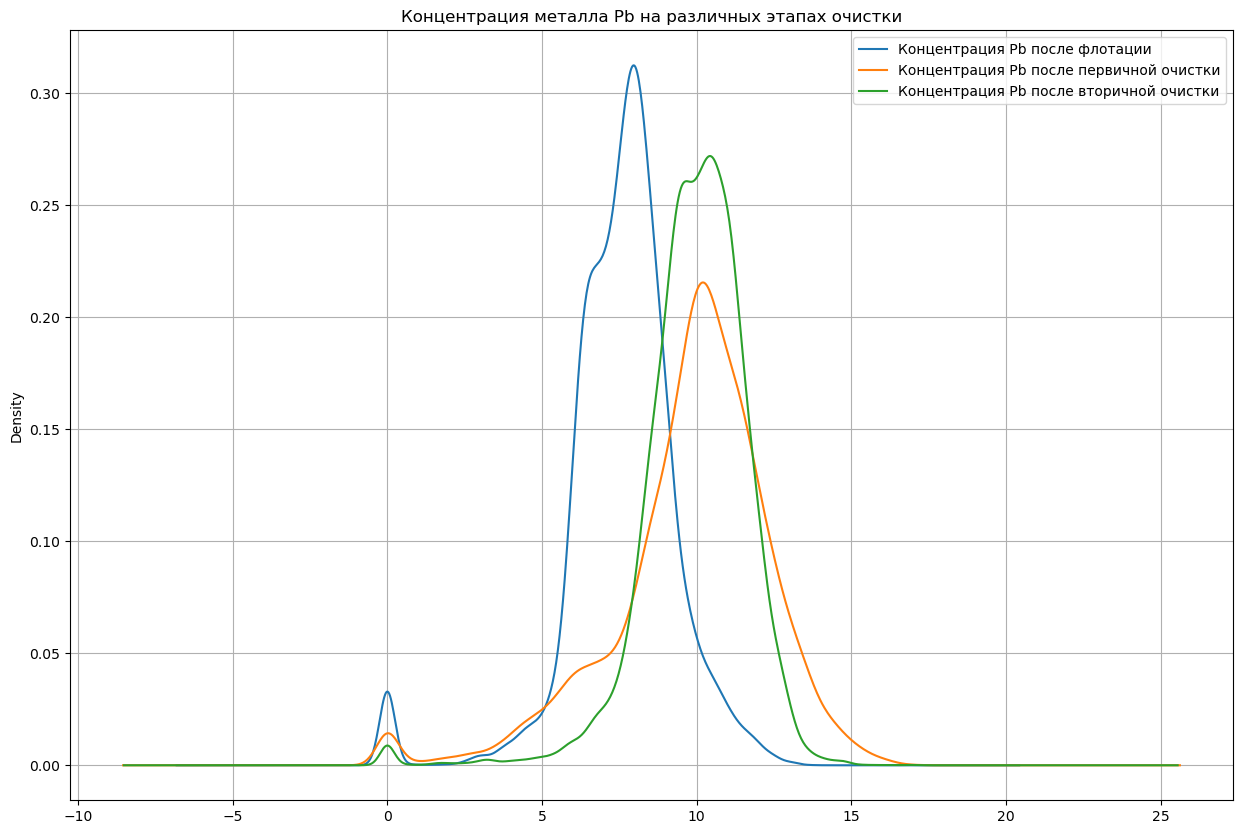

In [32]:
ax = plt.gca()

data_gold_full.plot(kind='kde', y='rougher.output.concentrate_pb', ax=ax, figsize=(15, 10))
data_gold_full.plot(kind='kde', y='primary_cleaner.output.concentrate_pb', ax=ax, figsize=(15, 10))
data_gold_full.plot(kind='kde', y='final.output.concentrate_pb', ax=ax, figsize=(15, 10))

plt.grid(True)
plt.title('Концентрация металла Pb на различных этапах очистки')
ax.legend(['Концентрация Pb после флотации', 'Концентрация Pb после первичной очистки', 
           'Концентрация Pb после вторичной очистки'])
plt.show()

На графике на оси абсцисс показывается концентрация металла, на оси ординат количество металлов с такой концетрацией. На графиках три разные линии, которые отображают разные этапы очистки золотой руды. Линии на графиках показывают распределение концентрации металлов на различных этапах очистки золотой руды. 

Первый график показывает концентрацию металла **Au**, то есть **золота**, после флотации видно, что концентрации **золота** достигает максимального значения равному **20**. Затем после первичной очистки концетрации **золота** максимально достигает **35**, однако падает количество элементов с такой концетрацией где-то в 2 раза по сравнению с концетрацией на прошлом этапе. И наконец после второго этапа очистки, концентрация **золота** достигает наибольшего значения равное где-то **45**, при этом достигается максимальное количество элементов с такой концентрацией **золота**. Можно сделать вывод, что с каждым последующим этапом очистки золотой руды увеличивается концентрация **золота**.

Второй график показывает концетрацию металла **Ag**, то есть **серебра**, после флотации видно, что концетрация **серебра** максимально равна где-то **12**, после первичной очистки концетрация наибольшая концентрация **серебра** равна примерно **8**, при этом чуть увеличивается количество элементов с такой концетрацией по сравнению с прошлым этапом. После вторичной очистки максимальная концетрация **серебра** равна примерно **5**, при этом увеличивается количество с такой концетрацией примерно в 2 раза по сравнению с прошлым этапом. Можно сделать вывод, что с каждым последующим этапом очистки золотой руды умешьшается концетрация **серебра**. Можно сказать, что между концетрацией **золота** и **серебра** есть *отрицательная корреляция*, то есть при увеличении концетрации **золота** уменьшается концетрация **серебра**.

Третий график показывает концетрацию металла **Pb**, то есть **свинца**, после флотации видно, что концетрация **свинца** максимально равно где-то **8**, после первичной очистки концетрация **свинца** увеличивается максимально до **10**, при этом уменьшается количество элементов с такой концетрацией, затем после вторичной очистки можно сказать, что максимальная концетрация **свинца** не сильно изменилась и равно примено **11**, однако увеличилось количество элементов с такой концетрацией. Можно сделать вывод, что независимо от этапов очистки золотой руды, концетрация **свинца** не сильно изменяется.

Также стоить отметить, что на всех графика видно поднятие прямых в нуле, это говорит о том, что есть элементы, которые после прохождения всех этапов очистки золотой руды, выдают нулевую концетрацию металла **золота**, **серебра** или **свинца**.

Сравним теперь размер гранул сырья в обучающей и тестовой выборке, чтобы проверить отличаются они друг от друга или нет, так как нам пристоит обучать модель, нам важно, чтобы этот параметр был одинаковый в обеих выборках, иначе будет неверная оценка модели. Размер гранул сырья хранится в признаках `primary_cleaner.input.feed_size` и `rougher.input.feed_size`, построим графики плотности по этим столбцам через метод `displot` библиотеки `sklearn`.

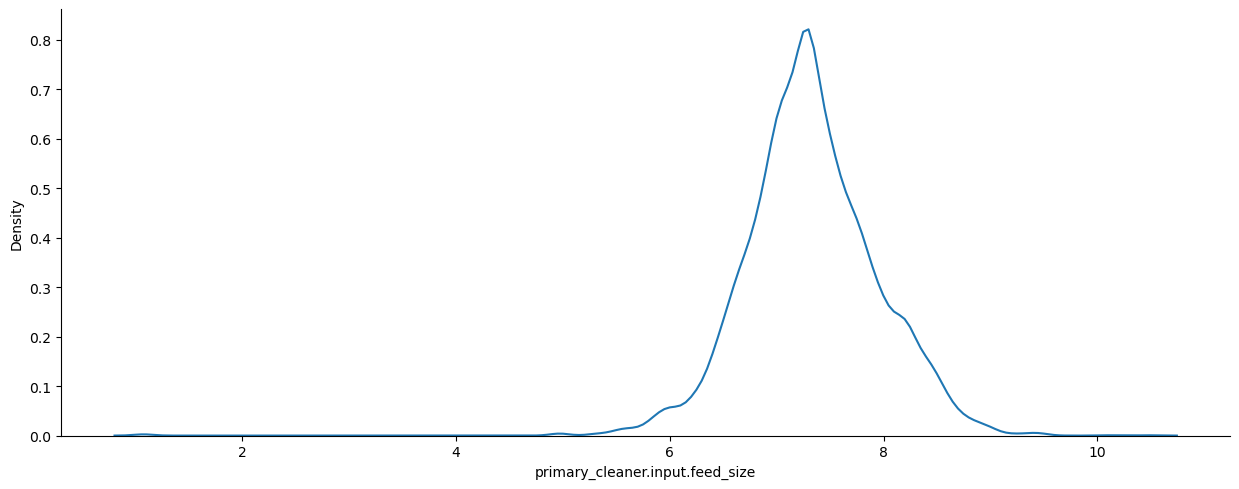

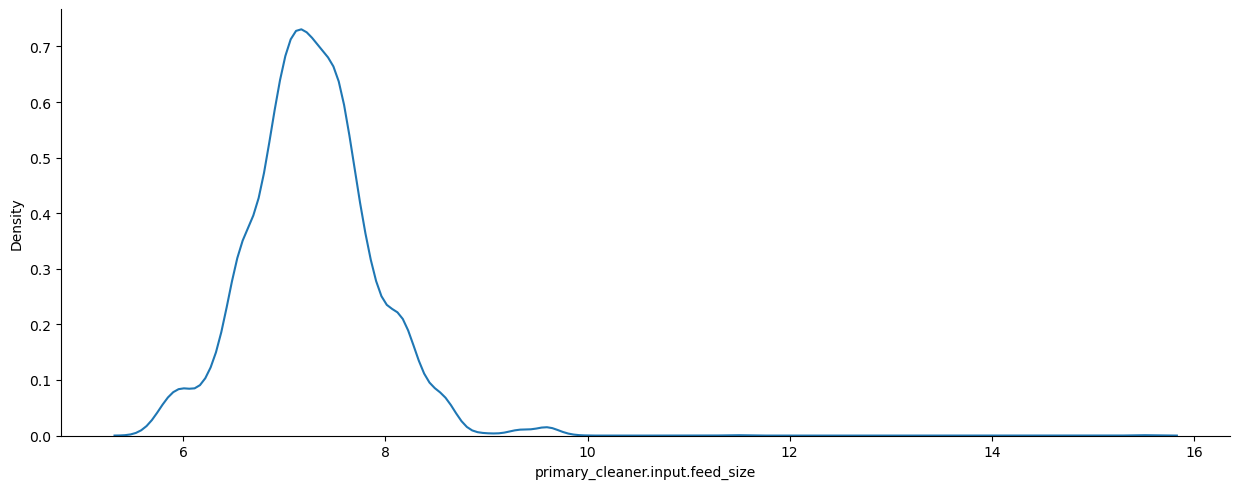

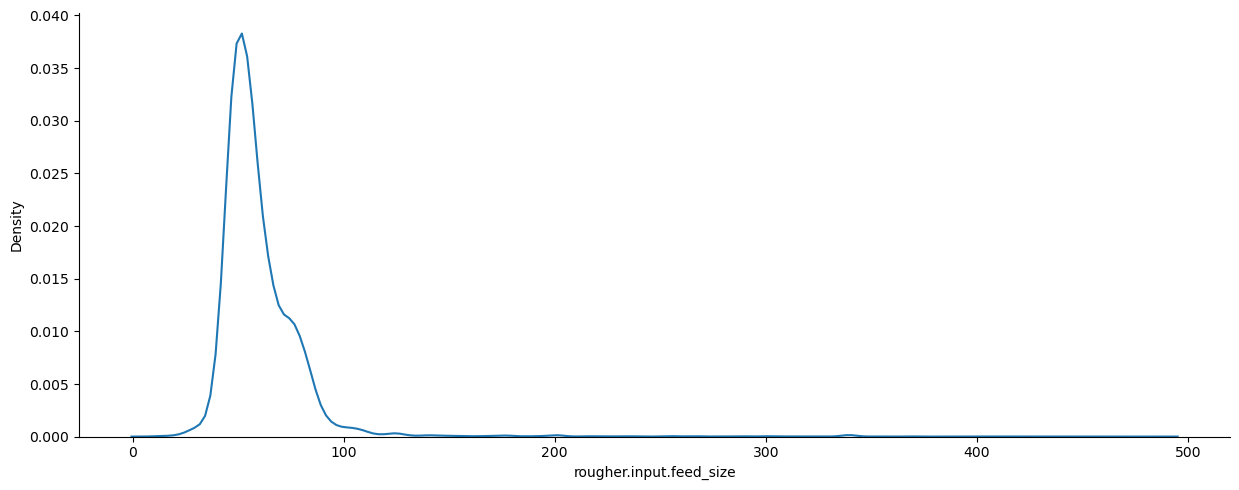

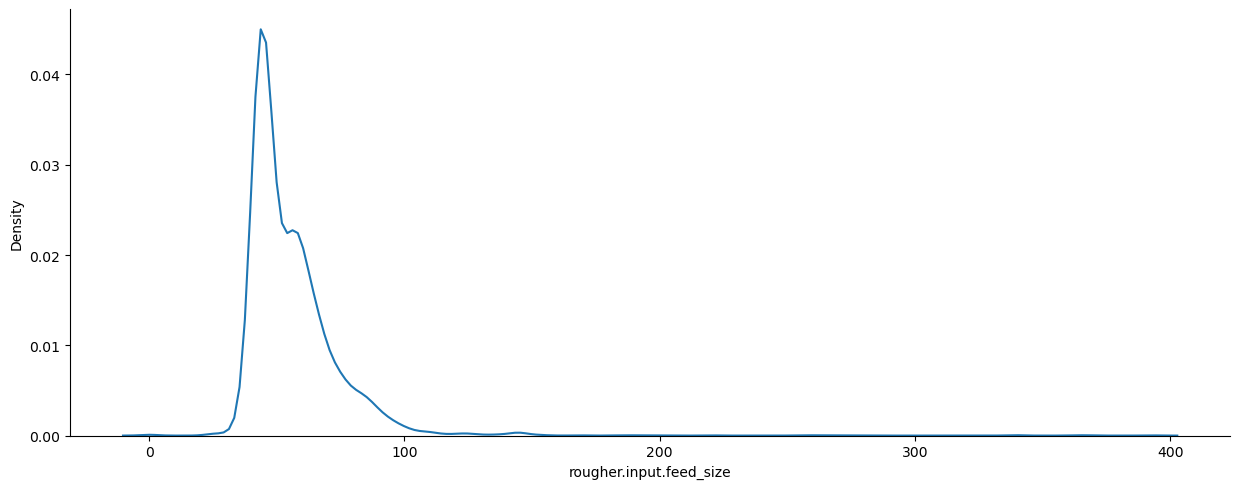

In [33]:
sns.displot(x='primary_cleaner.input.feed_size', aspect=2.5, data=data_gold_train, kind='kde')
sns.displot(x='primary_cleaner.input.feed_size', aspect=2.5, data=data_gold_test, kind='kde')
sns.displot(x='rougher.input.feed_size', aspect=2.5, data=data_gold_train, kind='kde')
sns.displot(x='rougher.input.feed_size', aspect=2.5, data=data_gold_test, kind='kde')
plt.show()
pass

Как видно на графиках, значения признака `primary_cleaner.input.feed_size` в основном находятся в диапазоне от **6** до **10** в обучающей и тестовой выборке, есть значения, которые выходят за рамки этого диапазона, но их не слишком много, также на двух вверних графиках заметно, что по этому признаку практически одинаковое распределение данных в обучающей и тестовой выборке. 

Значения признака `rougher.input.feed_size` находятся в диапазоне от **0** до **100** в обучающей и тестовой выборке, есть  значения, которые выходят за рамки этого диапазона, но их не слишком много. На двух нихниж графиках видно, что распределение по данному признаку в обучающей и тестовой выборках не сильно отличаются, заметна только разница в количестве элементов, но это из-за того что у выборок разные размеры.

На основании выше построенных графиках распределения размеров гранул сырья на обучающей и тестовой выборках не сильно отличаются и изменять их не нужно.

Изучим теперь суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах на общей выборке, будем изучать данные из следующих признаков:

- `rougher.input.feed_ag` — концетрация серебра в сырье 
- `rougher.input.feed_pb` — концетрация свинца в сырье
- `rougher.input.feed_sol` — концетрация различных солей в сырье
- `rougher.input.feed_au` —  концетрация золота в сырье


- `rougher.output.concentrate_ag` — концетрация серебра после флотации (в черновом концетрате)
- `rougher.output.concentrate_pb` — концетрация свинца после флотации (в черновом концетрате) 
- `rougher.output.concentrate_sol` — концетрация солей после флотации (в черновом концетрате) 
- `rougher.output.concentrate_au` —  концетрация золота после флотации (в черновом концетрате)


- `primary_cleaner.output.concentrate_ag` — концетрация серебра после первого этапа очистки 
- `primary_cleaner.output.concentrate_pb` — концетрация свинца после первого этапа очистки 
- `primary_cleaner.output.concentrate_sol` — концетрация солей после первого этапа очистки 
- `primary_cleaner.output.concentrate_au` —  концетрация золота после первого этапа очистки


- `final.output.concentrate_ag` — концетрация серебра после второго этапа очистки (в финальном концетрате)
- `final.output.concentrate_pb` — концетрация свинца после второго этапа очистки (в финальном концетрате) 
- `final.output.concentrate_sol` — концетрация солей после второго этапа очистки (в финальном концетрате) 
- `final.output.concentrate_au` —  концетрация золота после второго этапа очистки (в финальном концетрате)

Посчитаем суммарные значения по указзанным выше признакам и построим гисторамму по полученным значениям:

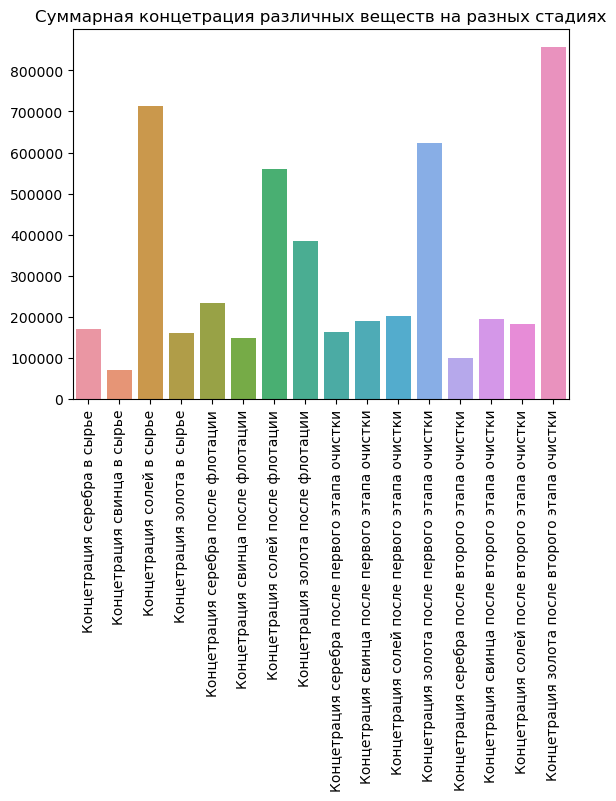

In [34]:
data_mean_concentrate = data_gold_full[['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 
                                        'rougher.input.feed_au', 'rougher.output.concentrate_ag', 
                                        'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 
                                        'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 
                                        'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 
                                        'primary_cleaner.output.concentrate_au', 'final.output.concentrate_ag', 
                                        'final.output.concentrate_pb', 'final.output.concentrate_sol', 
                                        'final.output.concentrate_au']].sum() #считаем суммарную концетрацию для каждого 
                                                                              #вещества на различных этапах

data_mean_concentrate.columns = ['Концетрация серебра в сырье', 'Концетрация свинца в сырье', 'Концетрация солей в сырье',
                                'Концетрация золота в сырье', 'Концетрация серебра после флотации', 
                                'Концетрация свинца после флотации', 'Концетрация солей после флотации',
                                'Концетрация золота после флотации', 'Концетрация серебра после первого этапа очистки',
                                'Концетрация свинца после первого этапа очистки', 
                                'Концетрация солей после первого этапа очистки',
                                'Концетрация золота после первого этапа очистки', 
                                'Концетрация серебра после второго этапа очистки',
                                'Концетрация свинца после второго этапа очистки', 
                                'Концетрация солей после второго этапа очистки',
                                'Концетрация золота после второго этапа очистки']

sns.barplot(x=data_mean_concentrate.columns, y=data_mean_concentrate.values)
plt.title('Суммарная концетрация различных веществ на разных стадиях')
plt.rcParams['figure.figsize'] = [15, 10]
plt.xticks(rotation=90)
plt.show()

По графику видно, что больше всего различных **солей** в сырье и больше всего концетрация **золота** в финальном концентрате, концетрация **солей** постпенно падает к финальному концетрату, а вот концетрация **золота** наоборот растет. Концетрата **серебра** немного вырастает в черновом концетрате, но потом падает в финальной концетрате. Концетрация **свинца** в отличие от концетрации **серебра** наоборот постепенно выросла от сырья к финальному концетрату.

Исследовательский анализ данных мы провели можно приступать к обучению моделей.

## Модель

Прежде чем обучать модели, напишем функции для расчета итоговой метрики *sMAPE* по которой будем оценивать наши построенные модели:

In [35]:
def calc_smape(target, predictions):
    '''
    Функция рассчитывает метрику sMape
    '''
    return (1 / len(target)) * (np.sum(np.abs(target - predictions) / ((np.abs(target) + np.abs(predictions)) / 2))) * 100

In [36]:
def calc_total_smape(target, predictions):
    '''
    Функция рассчитывает итоговую метрику sMape
    '''
    #return 0.25 * calc_smape(target_rougher, predictions_rougher) + 0.75 * calc_smape(target_final, predictions_final)
    return 0.25 * calc_smape(target['rougher.output.recovery'], predictions[:, 0]) + 0.75 * calc_smape(
        target['final.output.recovery'], predictions[:, 1])

Функции для расчета метрики *sMape* подготовлены. Теперь необходимо выбрать из выборок признаки для моделей, по которым мы будем предсказывать значения в целевых признаках:

1. эффективность обогащения чернового концентрата `rougher.output.recovery`;
2. эффективность обогащения финального концентрата `final.output.recovery`.

Для предсказания целевых признаков `rougher.output.recovery` и `final.output.recovery` возьмем признаки из этапа `rougher` — флотации со следующими типами параметров — `input` — параметры сырья и `calculation` — расчётные характеристики, в эти признаки входит информация о **концетрации разлиных веществ в сырье, который коррелируют с концетрацией золота на различных этапах очистки согласно проведенному исследовательскому анализу**. Берем эти признаки, потому что только они нам будут известны, когда поступит золотая руда для переработки её в золото. Все остальные признаки получаются уже после этапа обработки руды, соответственно мы не можем предсказывать целевой признак по данным признакам, так как они ещё не определены. У нас же цель по вводным параметрам определить стоит ли вообще запускать процесс обработки руды до самого начального этапа обработки руды.

Разделим данные по признакам:

In [37]:
features_columns = ['rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 
                    'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 
                    'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate', 'rougher.input.feed_size',
                    'rougher.input.feed_sol', 'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate', 
                    'rougher.input.floatbank10_xanthate', 'rougher.input.floatbank11_sulfate', 
                    'rougher.input.floatbank11_xanthate']

data_train_features = data_gold_train[features_columns]
data_train_target = data_gold_train[['rougher.output.recovery', 'final.output.recovery']]

data_test_features = data_gold_test[features_columns]
data_test_target = data_gold_test[['rougher.output.recovery', 'final.output.recovery']]


print(data_train_features.shape)
print(data_train_target.shape)
print(data_test_features.shape)
print(data_test_target.shape)

(14149, 14)
(14149, 2)
(5290, 14)
(5290, 2)


Как видно по размерностям данные по количество признаков и строк разделились корректно. Посмотрим теперь на данные в признаках, чтобы определить насколько сильно они отличаются друг от друга:

In [38]:
data_train_features

,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate
0,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818
1,42050.861809,3498.370979,3489.981857,2.858998,6.161113,2.266033,525.290581,57.278666,35.753385,6.478583,11.971193,6.005766,11.996163,6.012594
2,42018.101184,3495.348910,3502.359819,2.945989,6.116455,2.159622,530.026610,57.510649,35.971630,6.362222,11.920603,6.197377,11.920305,6.204633
3,42029.447991,3498.578313,3499.162912,3.002340,6.043309,2.037807,542.590390,57.792734,36.862241,6.118189,11.630094,6.203177,11.692450,6.196578
4,42125.354245,3494.800771,3506.679315,3.169615,6.060915,1.786875,540.531893,56.047189,34.347666,5.663707,10.957755,6.198826,10.960521,6.194897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,45912.942619,2497.652954,2499.177950,1.155559,6.091855,4.617558,560.889077,85.718304,37.369774,5.335862,7.762770,9.158609,7.766744,9.156069
14145,46200.099585,2614.403937,2518.550078,1.167342,6.121323,4.144989,559.031805,119.499241,38.591551,4.838619,7.356687,9.304952,7.095508,9.297924
14146,44585.181334,2510.813545,2510.142433,1.125637,5.970515,4.020002,555.682872,122.262690,40.074026,4.525061,6.586020,9.299606,6.584130,9.300133
14147,44084.735708,2507.572494,2507.723361,1.117935,6.048130,3.902537,544.731687,123.742430,39.713906,4.362781,6.210119,9.297709,6.209517,9.297194


Как видно по признакам, есть числа, которые не превышают 100, а есть и те, которые больше 1000, так как мы решаем задачу регрессии, то нам нужно привести признаки к единному масштабу, сделаем это с помощью метода масштабирования — **стандартизации данных**, примением его на наших данных, для этого воспользуемся структурой *StandardScaler* из библиотеки `sklearn`.

In [39]:
scaler = StandardScaler()
scaler.fit(data_train_features[features_columns])

data_train_features[features_columns] = scaler.transform(data_train_features[features_columns])
data_test_features[features_columns] = scaler.transform(data_test_features[features_columns])

In [40]:
data_train_features

,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate
0,0.003954,0.004364,0.039537,0.539624,-1.307243,-1.119747,0.476389,-0.206623,0.104001,-0.719183,0.072673,0.140004,0.123349,0.162949
1,0.004389,0.007238,0.035042,0.562876,-1.275213,-1.137067,0.493139,-0.128722,-0.107996,-0.723125,0.068010,0.137994,0.165324,0.168418
2,0.004303,0.006715,0.036875,0.662463,-1.298765,-1.234690,0.538619,-0.118638,-0.064150,-0.783747,0.052716,0.311167,0.145351,0.323418
3,0.004332,0.007274,0.036402,0.726973,-1.337339,-1.346444,0.659270,-0.106376,0.114779,-0.910885,-0.035108,0.316409,0.085357,0.316916
4,0.004585,0.006620,0.037515,0.918468,-1.328054,-1.576651,0.639502,-0.182254,-0.390412,-1.147664,-0.238363,0.312477,-0.107360,0.315560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,0.014549,-0.166133,-0.111682,-1.387209,-1.311738,1.020246,0.834993,1.107542,0.216745,-1.318466,-1.204239,2.987456,-0.948282,2.705603
14145,0.015304,-0.145906,-0.108814,-1.373720,-1.296198,0.586706,0.817158,2.575991,0.462206,-1.577523,-1.327002,3.119717,-1.125018,2.820098
14146,0.011056,-0.163853,-0.110059,-1.421464,-1.375728,0.472042,0.784998,2.696118,0.760042,-1.740882,-1.559983,3.114886,-1.259664,2.821882
14147,0.009739,-0.164415,-0.110417,-1.430281,-1.334797,0.364278,0.679833,2.760442,0.687693,-1.825428,-1.673621,3.113172,-1.358299,2.819510


Признаки привели к одному масштабу, можно приступать к обучению моделей. Для обучения возьмем следующие модели **Линейная регрессия**, **Дерево решений для регрессии**, **Случайный лес для регрессии**. Для проверки насколько хорошо обучились модели будем использовать кросс-валидацию. Для оценки моделей будем использовать метрику *sMAPE* для расчета которой ранее написали функции.

In [41]:
smape_scorer = make_scorer(calc_total_smape, greater_is_better=False)

In [42]:
smape_scorer = make_scorer(calc_total_smape, greater_is_better=False)

In [43]:
model_linear_reg = LinearRegression()
model_tree_reg = DecisionTreeRegressor()
model_forest_reg = RandomForestRegressor()

scores_linear_reg = cross_val_score(model_linear_reg, data_train_features, data_train_target, scoring=smape_scorer, cv=5)
scores_tree_reg = cross_val_score(model_tree_reg, data_train_features, data_train_target, scoring=smape_scorer, cv=5)
scores_forest_reg = cross_val_score(model_forest_reg, data_train_features, data_train_target, scoring=smape_scorer, cv=5)

print('sMAPE Кросс-валидация Линейной регрессии', abs(scores_linear_reg.mean()))
print('sMAPE Кросс-валидация Дерево решений для регрессии', abs(scores_tree_reg.mean()))
print('sMAPE Кросс-валидация Случайного леса для регрессии', abs(scores_forest_reg.mean()))

sMAPE Кросс-валидация Линейной регрессии 10.886713003975357
sMAPE Кросс-валидация Дерево решений для регрессии 17.643495892092908
sMAPE Кросс-валидация Случайного леса для регрессии 12.002241825640288


По кросс-валидации самая лучшая модель по метрике *sMAPE* модель **Линейной регрессии** она в **10.88%** случаев неверно предсказывает данные относительно валидационной выборки, которая используется внутри кросс-валидации. Самая плохая модель по кросс-валидации, модель **Дерево решений для регрессии**, метрика *sMAPE* равна **18.11%**, лучше результат у модели **Случайного леса для регрессии** метрика *sMAPE* равна **12.11%**. Сделаем теперь перебор гиперпараметров с помощью `GridSearchCV` для моделей **Дерево решений для регрессии** и **Случайного леса для регрессии**, может получиться подобрать модель с более низким значением по метрике *sMAPE*.

In [44]:
model_tree = DecisionTreeRegressor()
grid_tree = GridSearchCV(model_tree, param_grid={'max_depth': [1, 20]}, scoring=smape_scorer)
grid_tree.fit(data_train_features, data_train_target)
print('Best params', grid_tree.best_params_)
print('sMAPE Дерева решений для регрессии', abs(grid_tree.best_score_))

Best params {'max_depth': 1}
sMAPE Дерева решений для регрессии 11.638815114646734


При глубине дерева равное **1** метрика *sMAPE* у модели **Дерево решений для регрессии** достигает минимального значения и равна **11.63%**, это намного меньше значения, которые было получено по метркие *sMAPE* у данной модели при кросс-валидации — **18.11%**, но все еще больше, чем модели **Линейной регрессии**. Сделаем перебор гиперпараметров с помощью `GridSearchCV` для модели **Случайного леса для регрессии**:

In [45]:
model_forest = RandomForestRegressor(random_state=0)
grid_forest = GridSearchCV(model_forest, param_grid={'max_depth': [1, 30], 'n_estimators': [1, 100]}, 
                           scoring=smape_scorer)
grid_forest.fit(data_train_features, data_train_target)
print('Best params', grid_forest.best_params_)
print('sMAPE Случайного леса для регрессии', abs(grid_forest.best_score_))

Best params {'max_depth': 1, 'n_estimators': 100}
sMAPE Случайного леса для регрессии 11.487770422242445


У модели **Случайный лес для регресии** при количестве деревьев равное **100** и глубине деревьев равное **1** метрика *sMAPE* равна **11.47%**, это меньше, чем у данной модели при кросс-валидации, но все ещё больше, чем у модели **Линейной регрессии**. С помощью перебора гиперпараметров у модели **Дерево решений для регрессии** и **Случайный лес для регресии** не удалось найти модель по метркие *sMAPE* лучше, чем модель **Линейной регрессии**, поэтому для проверки на тестовой выборке будем использовать модель **Линейной регрессии**, так как данная модель показала себя лучше всех по метрике *sMAPE* — **10.88%**.

In [46]:
model_linear_reg.fit(data_train_features, data_train_target)
predictions_test = model_linear_reg.predict(data_test_features)
print('sMAPE Линейной регрессии на тестовой выборке:', (calc_total_smape(data_test_target, predictions_test)))

sMAPE Линейной регрессии на тестовой выборке: 9.312872981092088


Как можно заметить на тестовой выборке у модели **Линейной регрессии** метрика *sMAPE* равна **9.31%**, это меньше, чем было при кросс-валидации. Проверим теперь модель на адекватность с помощью `DummyRegressor`, которая будет предсказывать только среднее значение.

In [47]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(data_train_features, data_train_target)
prediction_dummy_reg = dummy_regr.predict(data_test_features)
print('sMAPE DummyRegressor на тестовой выборке:', (calc_total_smape(data_test_target, prediction_dummy_reg)))

sMAPE DummyRegressor на тестовой выборке: 10.289630376021035


In [48]:
print(data_test_target.shape)
np.random.rand(data_test_target.shape[0], data_test_target.shape[1])

(5290, 2)


array([[0.50232195, 0.17254705],
       [0.18542469, 0.41369527],
       [0.7613449 , 0.77845412],
       ...,
       [0.83630514, 0.65472051],
       [0.72802541, 0.86814196],
       [0.26116288, 0.77152452]])

Метрика *sMAPE* у модели, которая предсказывает только среднее значение больше, чем у модели **Линейной регрессии**, которую мы выбрали для проверки на тестовой выборке, что говорит о том, что модель делает адекватные предсказания.

### Общий вывод

В рамках задания нам нужно было решить задачу "предсказать коэффициент восстановления золота из золотосодержащей руды" по предоставленным данным в нескольких выборках, чтобы не запускать предприятия с убыточными характеристиками. 

По предоставленным данным были восстановлены недостающие столбцы в тестовой выборке, чтобы в обучающей и тестовой выборке были доступны все признаки и их было одинаковое количество. Был проведен исследовательский анализ данных с помощью которого удалось найти корреляции между концетрациями веществ на различных этапах обработки золотой руды, в последствии чего было обучено несколько моделей машинного обучения.

При обучении моделей машинного обучения использовались признаки которые известны на этапе предоставления сырья. Модели для обучения были выбраны следующие **Линейная регрессия**, **Дерево решений для регрессии**, **Случайный лес для регрессии**. Для оценки качества моделей были использованы кросс-валидация с метрикой *sMAPE*, также был сделан перебор гиперпараметров с помощью `GridSearchCV` на моделях **Дерево решений для регрессии**, **Случайный лес для регрессии**, были получены следующие результаты.

Кросс-валидация с метрикой *sMAPE*:

- Линейная регрессия: **10.88%**;
- Дерево решений для регрессии: **18.51%**;
- Случайный лес для регрессии: **12.12%**.

`GridSearchCV` с метрикой *sMAPE* лучшие показатели:

- Дерево решений для регрессии: **11.63%**;
- Случайный лес для регрессии: **11.48%**;

На основании проведенной проверки на кросс-валидации и перебора гиперпараметров с помощью `GridSearchCV` была выбрана модель **Линейная регрессия** на тестовой выборке данная модель показала значение метрики *sMAPE* равное **9.31%**, что больше, чем среднее значение по данной метрике на кросс-валидациии.

На основании выше перечисленного для предсказания коэффициента восстановления золота из золотосодержащей руды необходимо использовать модель **Линейная регрессия**, так как данная модель показала минимальное значение по метрике *sMAPE* **9.31%** и это значение меньше, чем среднее значение по данной метрике на кросс-валидациии.